importing Jupyter notebook from total.ipynb


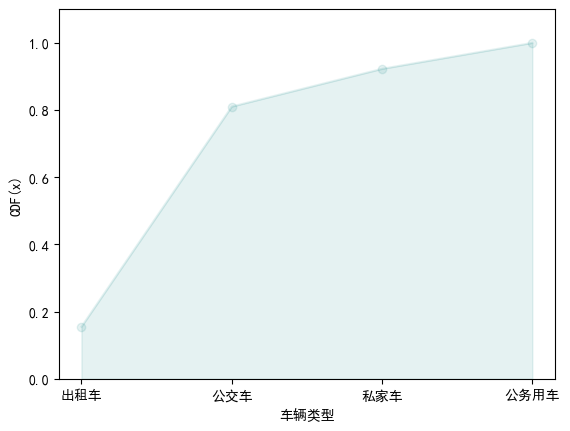

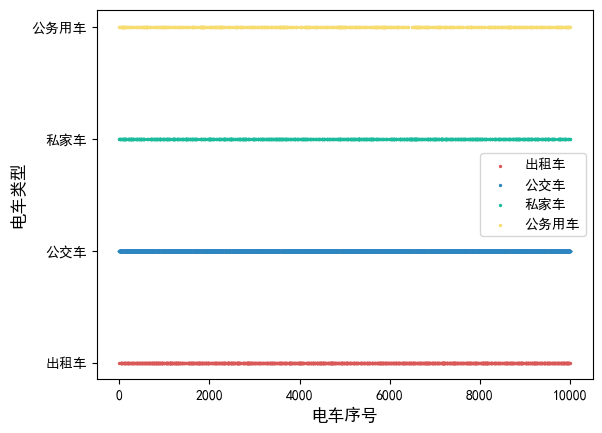

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pylab as pl
import random
import importer
from total import Tag,count,type_list,Inverse_Transform_Sampling

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

  ## 1. 电车日行驶里程数的概率模型参数：
- us_km：代表电车日行驶里程数的期望
- ds_km:代表电车日行驶里程数的标准差
- 各类型的电车日行驶里程数均服从于对数正态分布
- pdf_km_list为存储各电车概率密度函数值的列表
- CDF_km_list为存储各电车概率分布函数值的列表

In [2]:
us_km_list=[5.2,4.3,3.1,3.1]
ds_km_list=[0.34,0.34,0.86,0.86]

In [3]:
pdf_km_list=np.zeros((4, 500), dtype=float)
def log_normal(us_km, ds_km, pdf_km):
    for i in range(1, 500):
        new_km = 1/(i*ds_km*math.sqrt(2*math.pi)) * math.exp(-((math.log(i)-us_km)**2)/(2*ds_km**2))
        pdf_km[i]=new_km
        
for i in range(0,4):
    log_normal(us_km_list[i],ds_km_list[i],pdf_km_list[i])

pdf_km_list[3][20:30]

array([0.02302447, 0.02204391, 0.0210846 , 0.0201518 , 0.01924915,
       0.01837903, 0.01754284, 0.01674124, 0.01597434, 0.01524182])

In [4]:
CDF_km_list=np.zeros((4, 500), dtype=float)
for i in range(0,4):
    CDF_km_list[i][0]=pdf_km_list[i][0]
    for j in range(1,500):
        CDF_km_list[i][j]=CDF_km_list[i][j-1]+pdf_km_list[i][j]

CDF_km_list[3][0:10]

array([0.        , 0.00069969, 0.00531892, 0.01562886, 0.03155492,
       0.05221473, 0.07652357, 0.10345502, 0.13213142, 0.1618401 ])

  ## 2. 电车日行驶里程数的概率模型绘图：

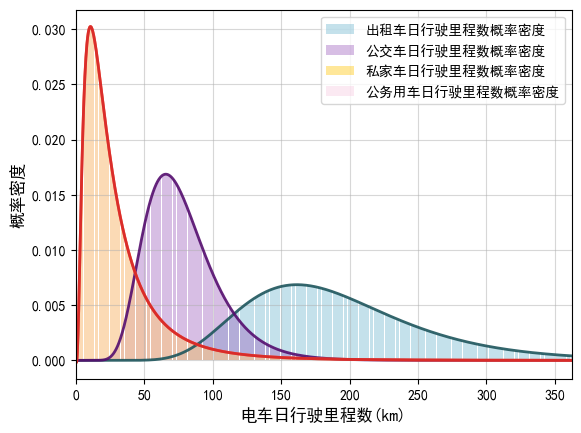

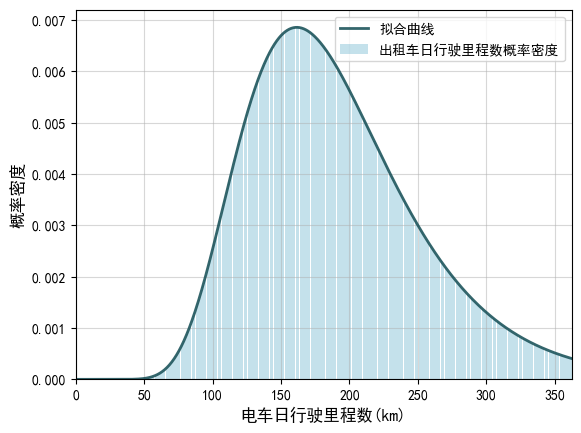

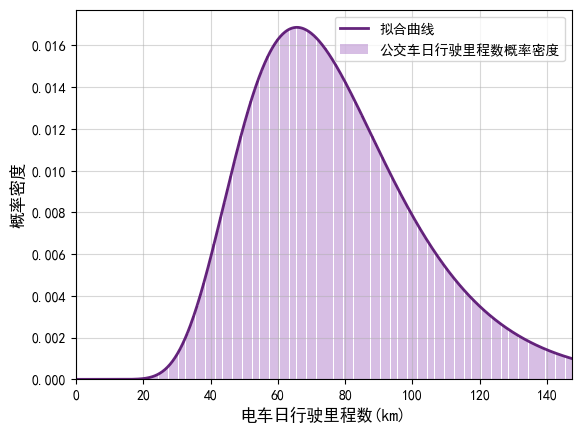

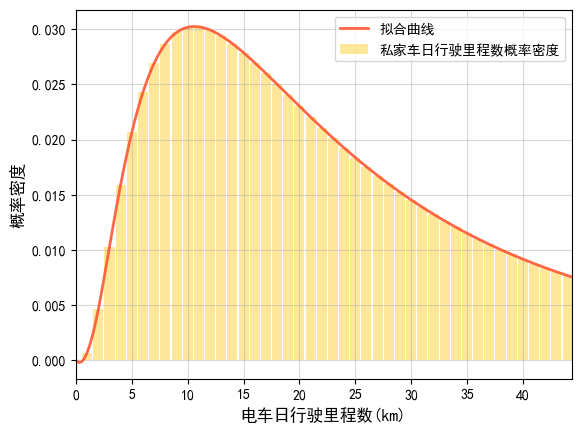

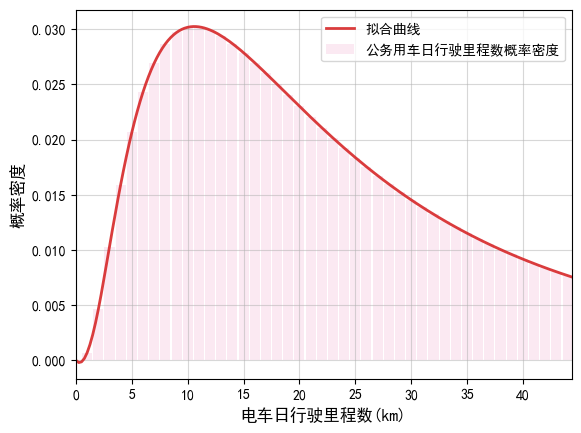

In [5]:
color=['#6CB4CE','#9B5DBC','#FFC300','#F7C8E0']
line_color=['#1E555C','#540D6E','#FF5733','#d62728']

#合在一起显示
for i in range(4):
    x = range(500)
    y = np.array(pdf_km_list[i])
    plt.bar(x, y, color=color[i], width=0.9, alpha=0.4, label="{}日行驶里程数概率密度".format(Tag[i]))

    # 进行插值拟合
    xnew = np.linspace(0, len(x)-1, 2000)
    f = interpolate.interp1d(x, y, 'cubic')  # 3阶插值
    ynew = f(xnew)

    plt.plot(xnew, ynew, color=line_color[i],linewidth=2, alpha=0.9)
    plt.xlabel("电车日行驶里程数(km)", fontsize=12)
    plt.ylabel("概率密度", fontsize=12)
    plt.xlim(0,(math.exp(np.max(us_km_list))*2))
    plt.grid(alpha=0.5)
    plt.legend(prop={'size': 10},framealpha=0.8, shadow=0)
plt.show()

#分开显示
for i in range(4):
    x = range(500)
    y = np.array(pdf_km_list[i])
    plt.bar(x, y, color=color[i], width=0.9, alpha=0.4, label="{}日行驶里程数概率密度".format(Tag[i]))

    # 进行插值拟合
    xnew = np.linspace(0, len(x)-1, 2000)
    f = interpolate.interp1d(x, y, 'cubic')  # 3阶插值
    ynew = f(xnew)

    plt.plot(xnew, ynew, color=line_color[i],linewidth=2, alpha=0.9, label="拟合曲线")
    plt.xlabel("电车日行驶里程数(km)", fontsize=12)
    plt.ylabel("概率密度", fontsize=12)
    plt.xlim(0,(math.exp(us_km_list[i])*2))
    plt.grid(alpha=0.5)
    plt.legend(prop={'size': 10},framealpha=0.8, shadow=0)
    plt.show()



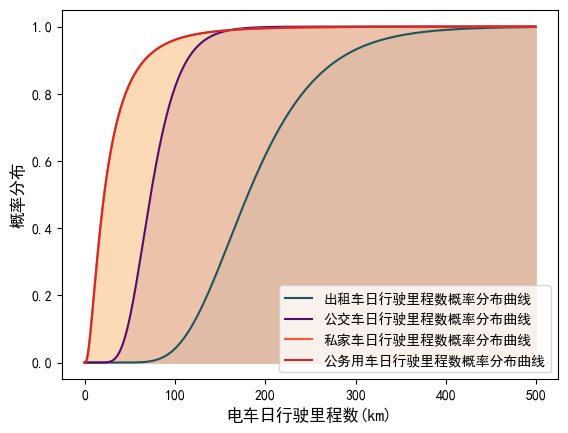

In [13]:
for i in range(0,4):
    plt.plot(CDF_km_list[i],color=line_color[i],label="{}日行驶里程数概率分布曲线".format(Tag[i]))
    plt.fill_between(x, CDF_km_list[i], color=color[i], alpha=0.4)
    plt.xlabel("电车日行驶里程数(km)", fontsize=12)
    plt.ylabel("概率分布", fontsize=12)
    plt.legend(prop={'size': 10})
plt.show()
